# Malware Detection - binary classification

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/ironmanciti/DeepLearning_ML_based_DataAnalysis/main/security_data/malware.csv', index_col=0)
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
26978,iexplore.exe,ff484b9824dcc3580e244a85352b425a,332,224,258,9,0,44544,624640,0,6922,4096,163840,4.194304e+06,4096,512,6,1,6,1,5,1,679936,1024,728205,2,32832,1048576,57344,1048576,4096,0,16,4,4.818222,0.291754,6.777117,167296.000000,2048,619008,166940.25,1748,618544,10,152,22,0,180,4.384464,2.186408,7.990925,3386.7000,20,67585,72,16,1
71368,VirusShare_aba338aa279d2edc208ea8c3adc2cdb4,aba338aa279d2edc208ea8c3adc2cdb4,332,224,258,10,0,120320,385024,0,61562,4096,126976,4.194304e+06,4096,512,5,1,0,0,5,1,528384,1024,573215,2,33088,1048576,4096,1048576,4096,0,16,5,5.633449,4.053766,7.962578,101068.800000,9728,330752,102626.20,9400,339652,3,89,0,0,6,3.671986,2.458492,5.317552,2739.5000,48,9640,72,15,0
106224,VirusShare_c8b22b719bcf452e61df803c55476327,c8b22b719bcf452e61df803c55476327,332,224,258,10,0,118784,383488,0,59882,4096,122880,4.194304e+06,4096,512,5,1,0,0,5,1,520192,1024,570975,2,33088,1048576,4096,1048576,4096,0,16,5,5.673942,4.226479,7.965301,100454.400000,9728,334336,101857.40,9364,334084,7,113,0,0,16,6.378131,2.458492,7.992688,20821.9375,48,33945,72,14,0
10238,mcstoredb.ni.dll,fcf892732a5d81c2e88a2bf3c7d04ebe,34404,240,8226,8,0,0,0,0,0,0,0,6.880832e+12,4096,512,5,2,0,0,5,2,544768,1024,0,3,320,0,0,0,0,0,16,6,4.038110,1.419196,6.548427,88746.666667,512,383488,88489.00,108,383306,0,0,0,0,1,3.543663,3.543663,3.543663,968.0000,968,968,0,16,1
75450,VirusShare_6770aaaf853db1ace6f7b0ed3fc5ce9c,6770aaaf853db1ace6f7b0ed3fc5ce9c,332,224,258,10,0,120320,385024,0,61578,4096,126976,4.194304e+06,4096,512,5,1,0,0,5,1,528384,1024,539101,2,33088,1048576,4096,1048576,4096,0,16,5,5.646444,4.117264,7.962776,101068.800000,9728,330752,102623.80,9404,339652,3,89,0,0,6,3.729824,2.458492,5.317552,2739.5000,48,9640,72,15,0


In [2]:
df.shape

(100000, 57)

In [4]:
df['legitimate'].value_counts()

0    69881
1    30119
Name: legitimate, dtype: int64

In [5]:
df.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

- Name : 제외
- md5 : hash value 제외

In [6]:
df = df.iloc[:, 2:]

In [7]:
df.shape

(100000, 55)

In [8]:
y = df.pop('legitimate').values
X = df.values

In [9]:
X.shape, y.shape

((100000, 54), (100000,))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 54), (20000, 54), (80000,), (20000,))

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [12]:
model = tf.keras.Sequential()

model.add(Dense(64, input_shape=(54,), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3520      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [15]:
history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_test, y_test))

Epoch 1/20
2500/2500 [==============================] - 8s 2ms/step - loss: 0.0610 - accuracy: 0.9835 - val_loss: 0.0400 - val_accuracy: 0.9884
Epoch 2/20
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0388 - accuracy: 0.9888 - val_loss: 0.0369 - val_accuracy: 0.9894
Epoch 3/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.0326 - val_accuracy: 0.9899
Epoch 4/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0310 - accuracy: 0.9898 - val_loss: 0.0317 - val_accuracy: 0.9896
Epoch 5/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0307 - val_accuracy: 0.9905
Epoch 6/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0277 - accuracy: 0.9901 - val_loss: 0.0295 - val_accuracy: 0.9907
Epoch 7/20
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0262 - accuracy: 0.9910 - val_loss: 0.0291 - val_accuracy:

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)

print(model.metrics_names)
print("Test score : {:.2f}".format(score[0]))
print("Test accuracy : {:.2f}".format(score[1]))

['loss', 'accuracy']
Test score : 0.03
Test accuracy : 0.99


In [17]:
y_pred = model.predict(X_test)[:, 0] > 0.5
y_pred

array([False, False,  True, ...,  True,  True, False])

In [18]:
y_test

array([0, 0, 1, ..., 1, 1, 0])

In [19]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("balanced_accuracy: {:.2f}".format(balanced_accuracy_score(y_test, y_pred)))
print("precision: {:.2f}".format(precision_score(y_test, y_pred)))
print("recall: {:.2f}".format(recall_score(y_test, y_pred)))

accuracy: 0.99
balanced_accuracy: 0.99
precision: 0.98
recall: 0.99


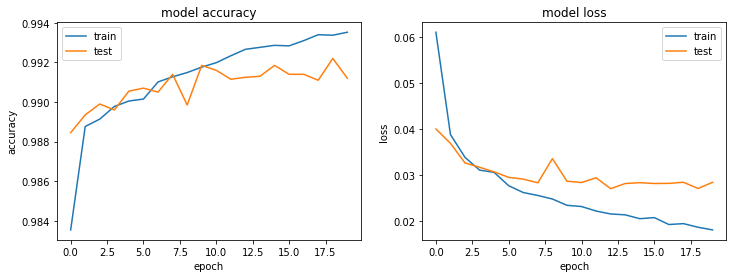

In [20]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])

### confusion matrix

[Text(0, 0.5, 'malware'), Text(0, 1.5, 'legitimate')]

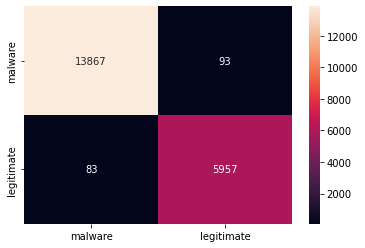

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cm, annot=True, fmt='d')
ax.xaxis.set_ticklabels(['malware', 'legitimate'])
ax.yaxis.set_ticklabels(['malware', 'legitimate'])